In [0]:
# Importing Libraries

import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam, RMSprop, Adadelta, Adagrad, Nadam, Adamax, SGD
from keras.callbacks import TensorBoard
from keras.layers.normalization import BatchNormalization

from matplotlib import pyplot
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [0]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()
print('\nX_train shape:', X_train.shape)
print('Y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', y_test.shape)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
n_cat = len(class_names)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, n_cat)
y_test = keras.utils.to_categorical(y_test, n_cat)

X_train = X_train/255
X_test = X_test/255

print(' \n Before creating Validation set: \n\n')
print(f' X_train Shape: {X_train.shape} \n')
print(f' y_train Shape: {y_train.shape} \n')
print(f' X_test Shape: {X_test.shape} \n')
print(f' y_test Shape: {y_test.shape} \n\n')

X_train, X_val,y_train,y_val = train_test_split(X_train, y_train, test_size = 0.33, random_state = 13)

print(' After creating Validation set: \n\n')
print(f' X_train Shape: {X_train.shape} \n')
print(f' y_train Shape: {y_train.shape} \n')
print(f' X_val Shape: {X_val.shape} \n')
print(f' y_val Shape: {y_val.shape} \n\n')


X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)
 
 Before creating Validation set: 


 X_train Shape: (50000, 32, 32, 3) 

 y_train Shape: (50000, 10) 

 X_test Shape: (10000, 32, 32, 3) 

 y_test Shape: (10000, 10) 


 After creating Validation set: 


 X_train Shape: (33500, 32, 32, 3) 

 y_train Shape: (33500, 10) 

 X_val Shape: (16500, 32, 32, 3) 

 y_val Shape: (16500, 10) 




 Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


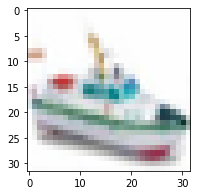

In [0]:
plt.figure(figsize=(3,3))
n_training = len(X_train)
gen_data = np.random.randint(0,n_training)   
plt.imshow(X_train[gen_data])
print(f' Label: {y_train[gen_data]}')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


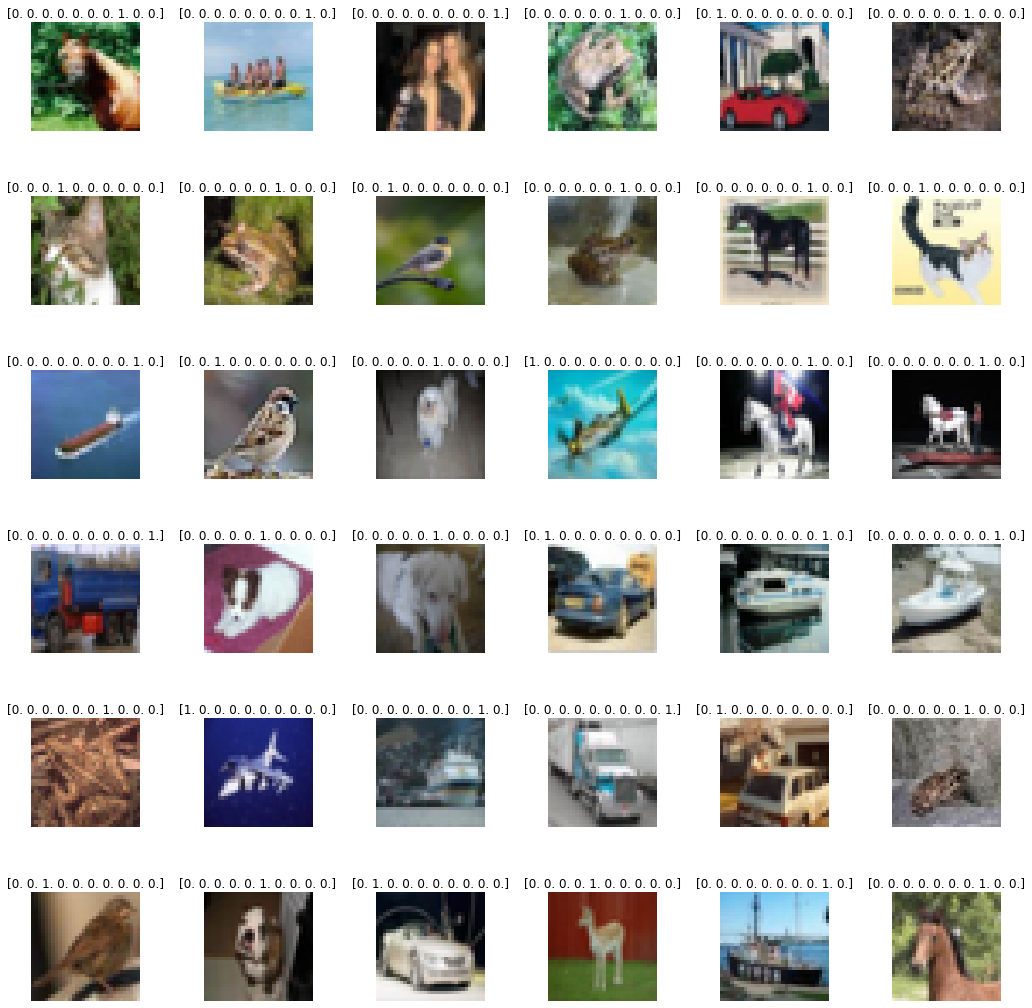

In [0]:
fig, axes = plt.subplots(6,6, figsize = (18, 18))
axes = axes.ravel()

for i in np.arange(0, 36):
    gen_data = np.random.randint(0, n_training) 
    axes[i].imshow(X_train[gen_data],cmap=plt.cm.binary) 
    axes[i].set_title(y_train[gen_data])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.6)

In [0]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [0]:
model = define_model()

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, brightness_range=(1,3))
it_train = datagen.flow(X_train, y_train, batch_size=64)

VGG_16 = model.fit_generator(it_train, steps_per_epoch=int(X_train.shape[0] / 64), epochs=500, validation_=(X_val, y_val), verbose=1)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500
523/523 [==============================] - 24s 47ms/step - loss: 2.2655 - acc: 0.2725 - val_loss: 1.5842 - val_acc: 0.4296
Epoch 2/500
523/523 [==============================] - 20s 39ms/step - loss: 1.7675 - acc: 0.3673 - val_loss: 1.4535 - val_acc: 0.4708
Epoch 3/500
523/523 [==============================] - 20s 39ms/step - loss: 1.6166 - acc: 0.4091 - val_loss: 1.4221 - val_acc: 0.4837
Epoch 4/500
523/523 [==============================] - 20s 38ms/step - loss: 1.5394 - acc: 0.4401 - val_loss: 1.4714 - val_acc: 0.4587
Epoch 5/500
523/523 [==============================] - 20s 38ms/step - loss: 1.4667 - acc: 0.4649 - val_loss: 1.5138 - val_acc: 0.4440
Epoch 6/500
523/523 [==============================] - 21s 41ms/step - loss: 1.4127 - acc: 0.4829 - 

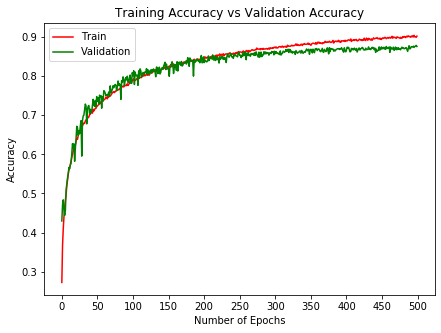

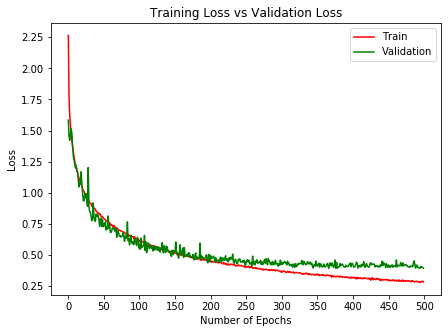

In [0]:
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 525, 50))
plt.rcParams['figure.figsize'] = (7,5 )
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['Train','Validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 525, 50))
plt.rcParams['figure.figsize'] = (7, 5)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['Train','Validation'])

plt.show()

In [0]:
evaluation = model.evaluate(X_test,y_test) 
print(f' Test Accuracy: {evaluation[1]}')

10000/10000 [==============================] - 1s 141us/step
 Test Accuracy: 0.8757


In [0]:
predicted_classes = model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 1, 7])

In [0]:
y_test_reversed = np.argmax(to_categorical(y_test, 10), axis=1)
y_test_final = y_test_reversed[:,1]

In [0]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

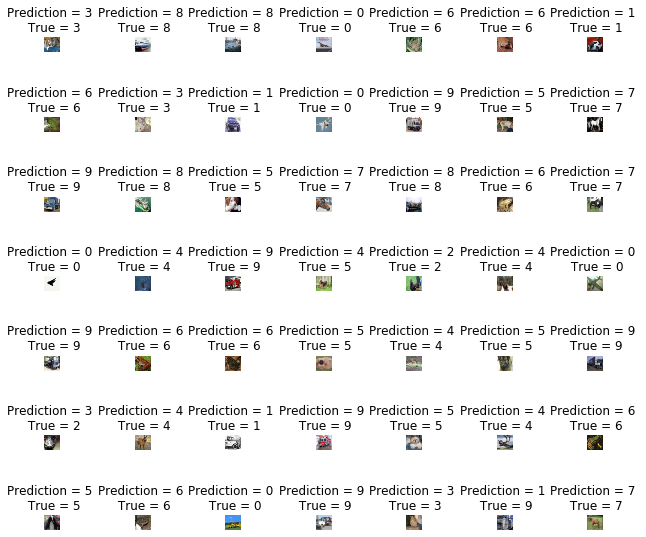

In [0]:
fig, axes = plt.subplots(7,7, figsize = (10,10))
axes = axes.ravel()

for i in np.arange(0,7*7):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {} \n True = {}'.format(predicted_classes[i],y_test_final[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 5)